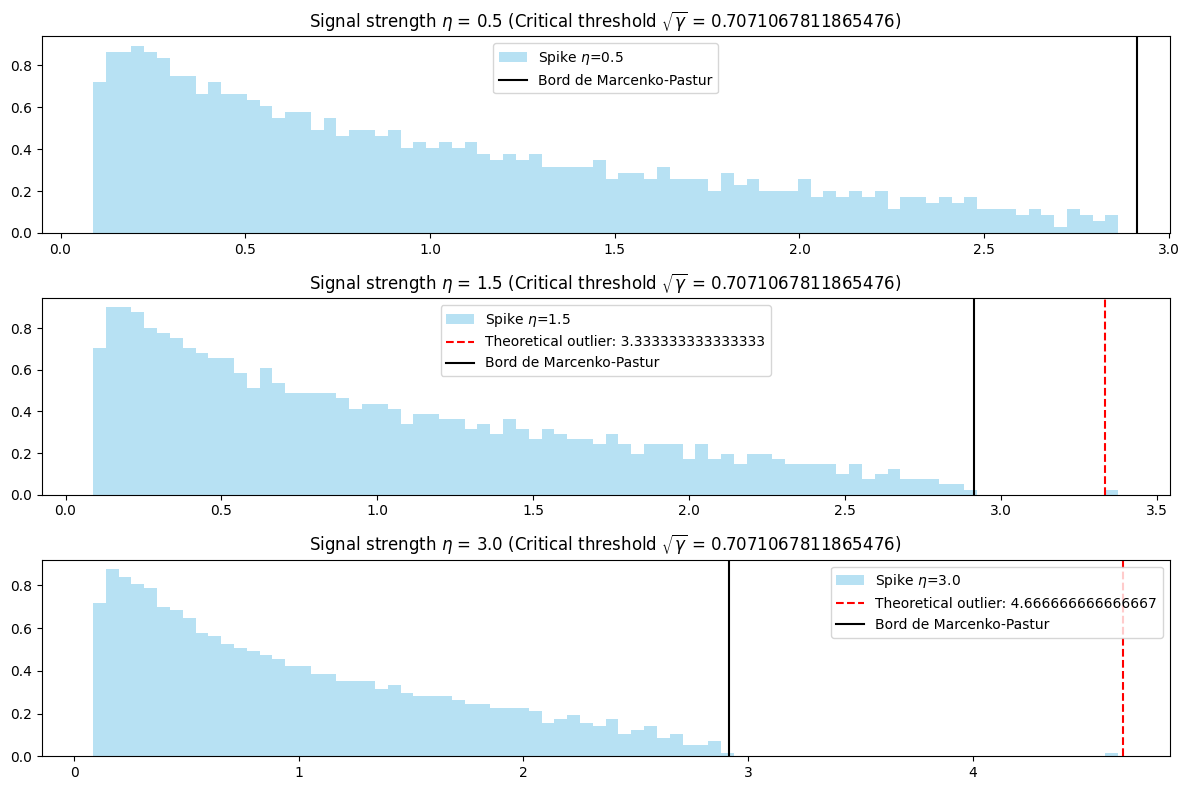

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

def simulate_bbp_transition(n=2000, p=1000, eta_values=[0.5, 1.5, 3.0]):
    gamma = p / n
    threshold = np.sqrt(gamma)

    plt.figure(figsize=(12, 8))

    # Support théorique de Marcenko-Pastur (pour le bulk)
    lambda_plus = (1 + np.sqrt(gamma))**2
    lambda_minus = (1 - np.sqrt(gamma))**2

    for i, eta in enumerate(eta_values):
        # white noise
        X = np.random.normal(0, 1, size=(p, n))

        # Sigma = I + eta*vv^T
        X[0, :] = X[0, :] * np.sqrt(1 + eta)

        # diagonalization of the sample covariance matrix
        S = (1/n) * (X @ X.T)
        eigenvalues = np.linalg.eigvalsh(S)

        # plotting
        plt.subplot(len(eta_values), 1, i+1)
        plt.hist(eigenvalues, bins=80, density=True, alpha=0.6, color='skyblue', label=f'Spike $\eta$={eta}')

        # theoretical position of outlier, eta > sqrt(gamma)
        if eta > threshold:
            lambda_outlier = (1 + eta) * (1 + gamma / eta)
            plt.axvline(lambda_outlier, color='red', linestyle='--', label=f'Theoretical outlier: {lambda_outlier}')

        plt.axvline(lambda_plus, color='black', linestyle='-', label='Bord de Marcenko-Pastur')
        plt.title(f"Signal strength $\eta$ = {eta} (Critical threshold $\sqrt{{\gamma}}$ = {threshold})")
        plt.legend()

    plt.tight_layout()
    plt.show()

simulate_bbp_transition()

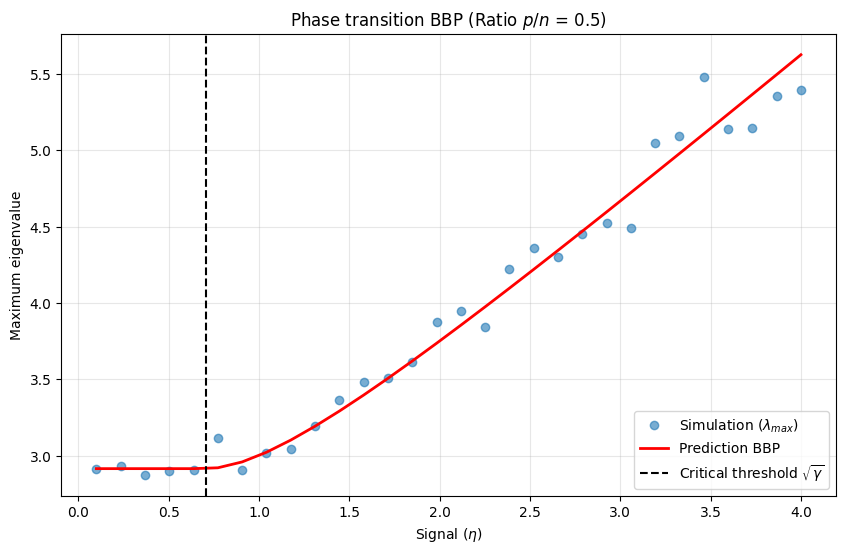

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def plot_bbp_convergence(n=1000, p=500):
    gamma = p / n
    threshold = np.sqrt(gamma)
    eta_range = np.linspace(0.1, 4, 30)

    empirical_max_evals = []
    theoretical_outliers = []

    bulk_edge = (1 + np.sqrt(gamma))**2

    for eta in eta_range:
        # Simulation
        X = np.random.normal(0, 1, size=(p, n))
        X[0, :] *= np.sqrt(1 + eta)
        S = (1/n) * (X @ X.T)
        empirical_max_evals.append(np.linalg.eigvalsh(S).max())

        # Théorie
        if eta > threshold:
            theoretical_outliers.append((1 + eta) * (1 + gamma / eta))
        else:
            theoretical_outliers.append(bulk_edge)

    plt.figure(figsize=(10, 6))
    plt.plot(eta_range, empirical_max_evals, 'o', label='Simulation ($\lambda_{max}$)', alpha=0.6)
    plt.plot(eta_range, theoretical_outliers, 'r-', label='Prediction BBP', linewidth=2)
    plt.axvline(threshold, color='black', linestyle='--', label=f'Critical threshold $\sqrt{{\gamma}}$')

    plt.xlabel('Signal ($\eta$)')
    plt.ylabel('Maximum eigenvalue')
    plt.title(f'Phase transition BBP (Ratio $p/n$ = {gamma})')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

plot_bbp_convergence()